In [5]:
# Our Setup, Import Libaries, Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

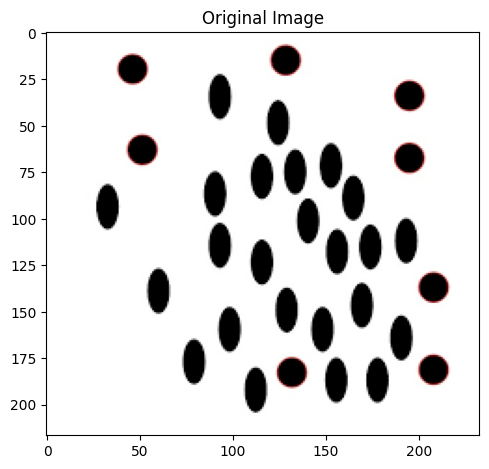

In [6]:
image = cv2.imread("elipse-circle.png")
imshow('Original Image', image)

In [7]:
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(image)

In [8]:
blobs = cv2.drawKeypoints(image, keypoints, None, (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

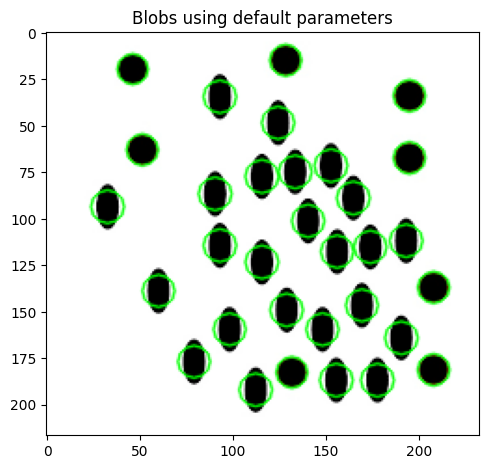

Total Number of Blobs: 32


In [12]:
imshow("Blobs using default parameters", blobs)
print(f"Total Number of Blobs: {len(keypoints)}")

## with custom parameters

In [14]:
params = cv2.SimpleBlobDetector_Params()

params.filterByArea = True
params.minArea = 100       # Enables filtering by area: Only detects blobs larger than 100 pixels

params.filterByCircularity = True
params.minCircularity = 0.9 #Enables filtering by circularity: Only detects blobs that are at least 90% circular.

params.filterByConvexity = False
params.minConvexity = 0.2   #Convexity measures how much a shape bulges outward.It's disabled (False), so convexity won’t affect detection.

In [15]:
detector = cv2.SimpleBlobDetector_create(params)   #filter added
keypoints = detector.detect(image)
blobs = cv2.drawKeypoints(image, keypoints, None, (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

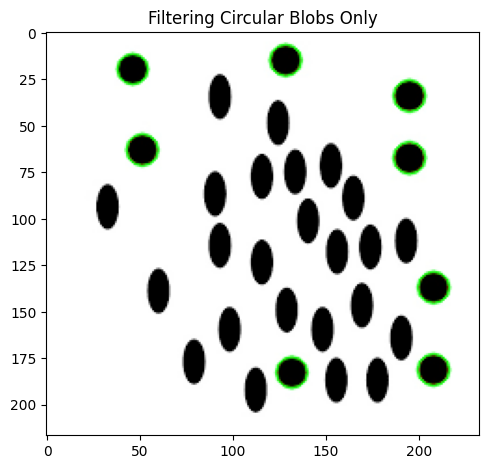

Total Number of Circular Blobs: 8


In [16]:
imshow("Filtering Circular Blobs Only", blobs)
print(f"Total Number of Circular Blobs: {len(keypoints)}")